# 数据集1：Github Dataset
## 数据摘要和可视化
首先导入需要的库，涉及数据处理，图形绘制等操作，然后读取csv文件内容。该数据库中包含项目路径、收藏数、分支数、版本数、拉取请求数、贡献者人数、主要语言类型七个属性。

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

github_data = pd.read_csv('dataset/github/github_dataset.csv')

In [3]:
# 数据初步检查
print("数据库形状")
print("Github_data:", github_data.shape)
print("数据量，均值，标准差和五数概括")
print(github_data.describe())
print("语言类型统计")
language_counts = github_data['language'].value_counts()
print(language_counts)
print("缺失值统计")
print(github_data.isnull().sum())

数据库形状
Github_data: (1052, 7)
数据量，均值，标准差和五数概括
       stars_count  forks_count  issues_count  pull_requests  contributors
count  1052.000000  1052.000000   1052.000000    1052.000000   1052.000000
mean     81.976236    53.884981      8.656844       4.374525      8.364068
std     170.403116   127.699729     32.445154      27.913732     37.511807
min       0.000000     0.000000      1.000000       0.000000      0.000000
25%       1.000000     1.000000      1.000000       0.000000      0.000000
50%      12.000000     6.000000      2.000000       0.000000      2.000000
75%      65.250000    38.250000      6.000000       2.000000      4.000000
max     995.000000   973.000000    612.000000     567.000000    658.000000
语言类型统计
language
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26


language属性的直方图如下所示：

语言类型数: 51


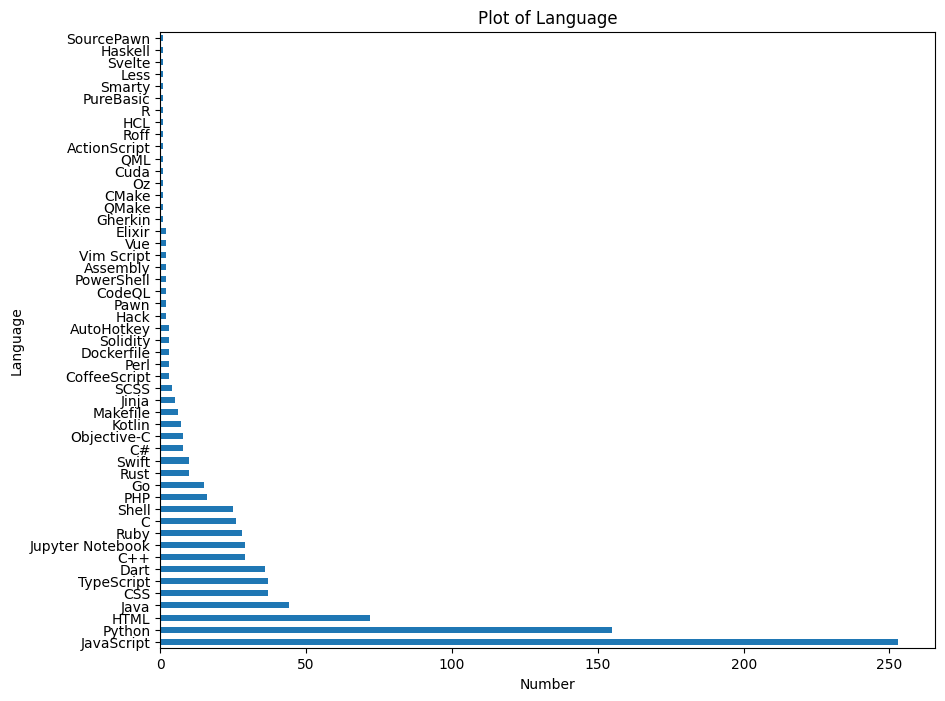

In [4]:
# 绘制直方图
print("语言类型数:", len(language_counts))
plt.figure(figsize=(10,8))
language_counts.plot(kind='barh')
plt.title('Plot of Language')
plt.xlabel('Number')
plt.ylabel('Language')
plt.show()

stars_count、forks_count、issues_count、pull_requests和contributors属性的盒图如下所示：

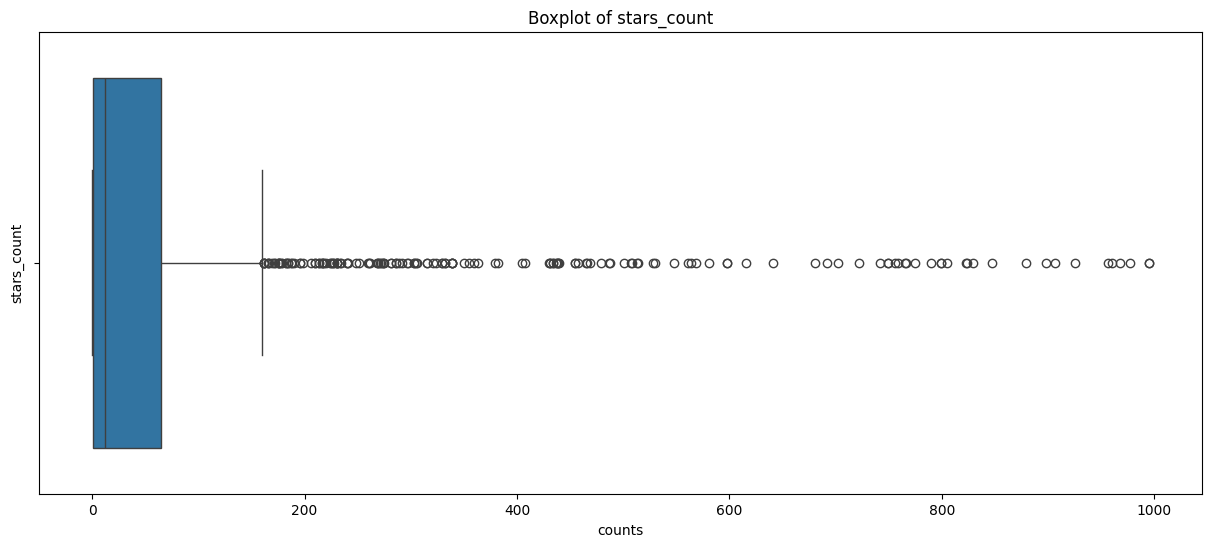

In [5]:
# 绘制盒图
plt.figure(figsize=(15, 6))
sns.boxplot(x=github_data['stars_count'])
plt.title('Boxplot of stars_count')
plt.ylabel('stars_count')
plt.xlabel('counts')
plt.show()

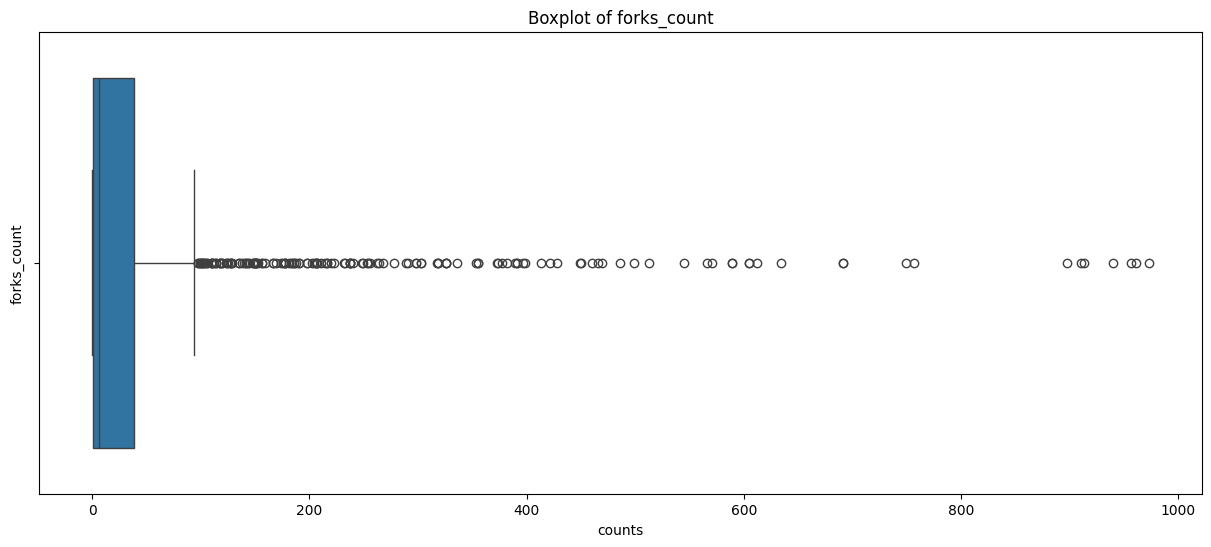

In [6]:
# 绘制盒图
plt.figure(figsize=(15, 6))
sns.boxplot(x=github_data['forks_count'])
plt.title('Boxplot of forks_count')
plt.ylabel('forks_count')
plt.xlabel('counts')
plt.show()

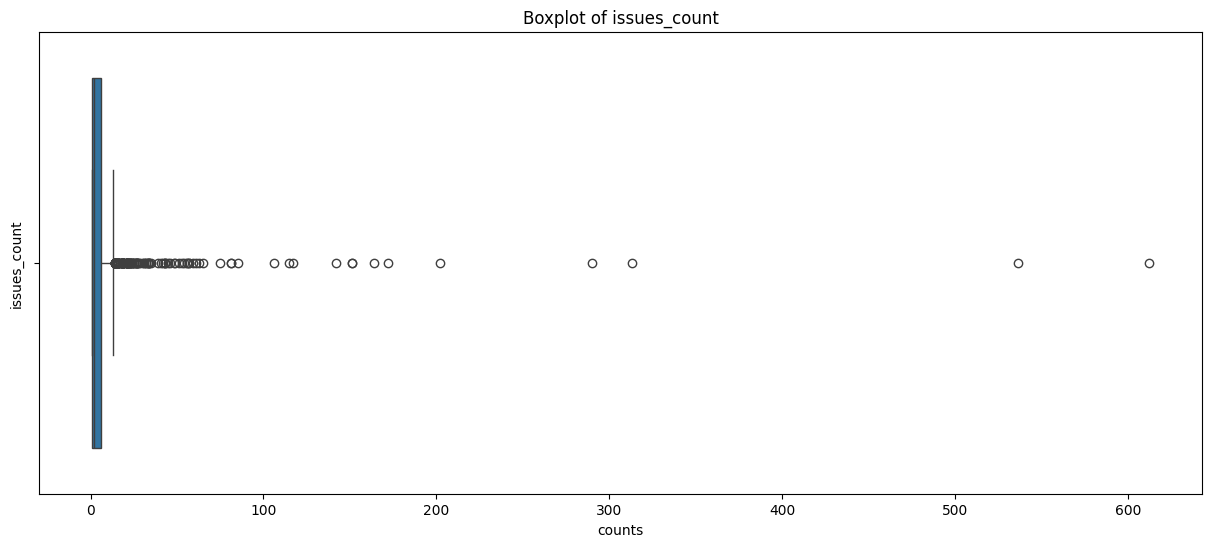

In [7]:
# 绘制盒图
plt.figure(figsize=(15, 6))
sns.boxplot(x=github_data['issues_count'])
plt.title(f'Boxplot of issues_count')
plt.ylabel('issues_count')
plt.xlabel('counts')
plt.show()

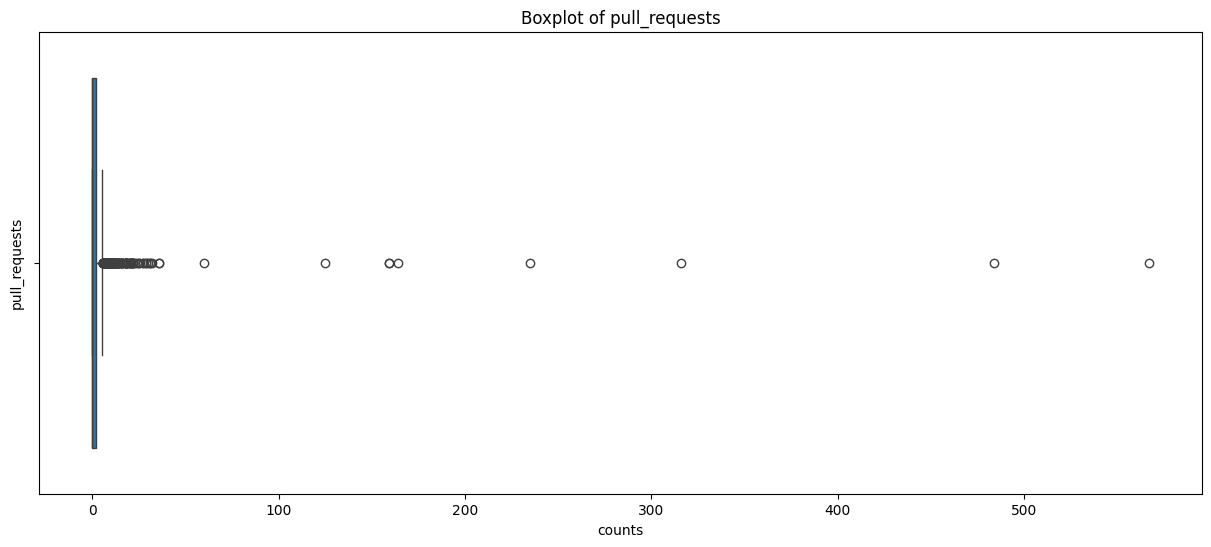

In [8]:
# 绘制盒图
plt.figure(figsize=(15, 6))
sns.boxplot(x=github_data['pull_requests'])
plt.title('Boxplot of pull_requests')
plt.ylabel('pull_requests')
plt.xlabel('counts')
plt.show()

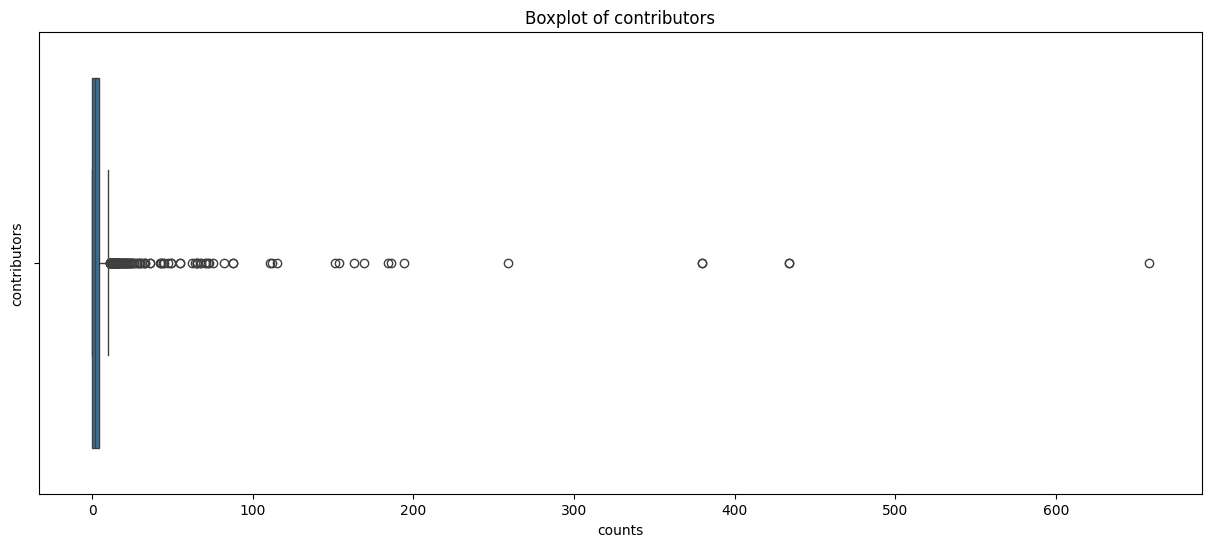

In [9]:
# 绘制盒图
plt.figure(figsize=(15, 6))
sns.boxplot(x=github_data['contributors'])
plt.title('Boxplot of contributors')
plt.ylabel('contributors')
plt.xlabel('counts')
plt.show()

## 数据缺失的处理
### 将缺失部分剔除
统计数据缺失信息后，发现表中主要是language缺失，在查阅Github有关项目后，推测此类缺失是由于这些项目没有主要编程语言，主要语言类型不好确定。
提供的四类处理方法中最好的是将缺失部分剔除。删除部分数据，新数据集的数据量减少，因此各属性均值，标准差和五数概括会发生变化。删除数据量不多，变化并不算十分显著。

In [10]:
github_data_dropped = github_data.dropna(subset=['language'])
print("数据量，均值，标准差和五数概括")
print(github_data_dropped.describe())
print("语言类型统计")
language_counts = github_data_dropped['language'].value_counts()
print(language_counts)
print("缺失值统计")
print(github_data_dropped.isnull().sum())

数据量，均值，标准差和五数概括
       stars_count  forks_count  issues_count  pull_requests  contributors
count   907.000000   907.000000    907.000000     907.000000    907.000000
mean     78.863286    51.239250      7.868798       3.074972      9.135612
std     165.824674   124.920359     22.085010      11.382517     40.154947
min       0.000000     0.000000      1.000000       0.000000      0.000000
25%       1.000000     1.000000      1.000000       0.000000      0.000000
50%      11.000000     6.000000      2.000000       0.000000      2.000000
75%      60.000000    35.000000      6.000000       2.000000      5.000000
max     977.000000   973.000000    313.000000     164.000000    658.000000
语言类型统计
language
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP  

新数据集stars_count的盒图如下所示：

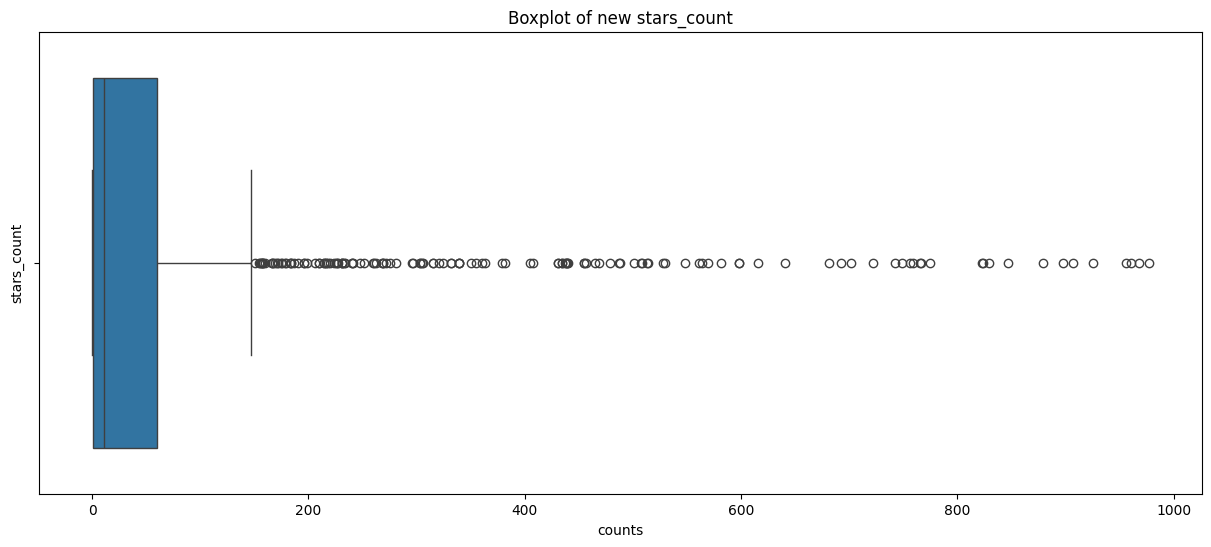

In [11]:
# 绘制盒图
plt.figure(figsize=(15, 6))
sns.boxplot(x=github_data_dropped['stars_count'])
plt.title('Boxplot of new stars_count')
plt.ylabel('stars_count')
plt.xlabel('counts')
plt.show()

### 用最高频率值来填补缺失值
统计language的类型和频率后，发现频率最高的是JavaScript，用其填补缺失值，language中JavaSript的频率上升。新数据集的数据量，均值，标准差和五数概括不变。

In [12]:
mode_value = github_data['language'].mode()[0]
github_data_filled = github_data.fillna({'language': mode_value})
print("数据量，均值，标准差和五数概括")
print(github_data_filled.describe())
print("语言类型统计")
language_counts = github_data_filled['language'].value_counts()
print(language_counts)
print("缺失值统计")
print(github_data_filled.isnull().sum())

数据量，均值，标准差和五数概括
       stars_count  forks_count  issues_count  pull_requests  contributors
count  1052.000000  1052.000000   1052.000000    1052.000000   1052.000000
mean     81.976236    53.884981      8.656844       4.374525      8.364068
std     170.403116   127.699729     32.445154      27.913732     37.511807
min       0.000000     0.000000      1.000000       0.000000      0.000000
25%       1.000000     1.000000      1.000000       0.000000      0.000000
50%      12.000000     6.000000      2.000000       0.000000      2.000000
75%      65.250000    38.250000      6.000000       2.000000      4.000000
max     995.000000   973.000000    612.000000     567.000000    658.000000
语言类型统计
language
JavaScript          398
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
Jupyter Notebook     29
C++                  29
Ruby                 28
C                    26
Shell                25
PHP  

如下图所示，language与其他变量相关性极低，且数据量较少，其他两种处理方式不适合。

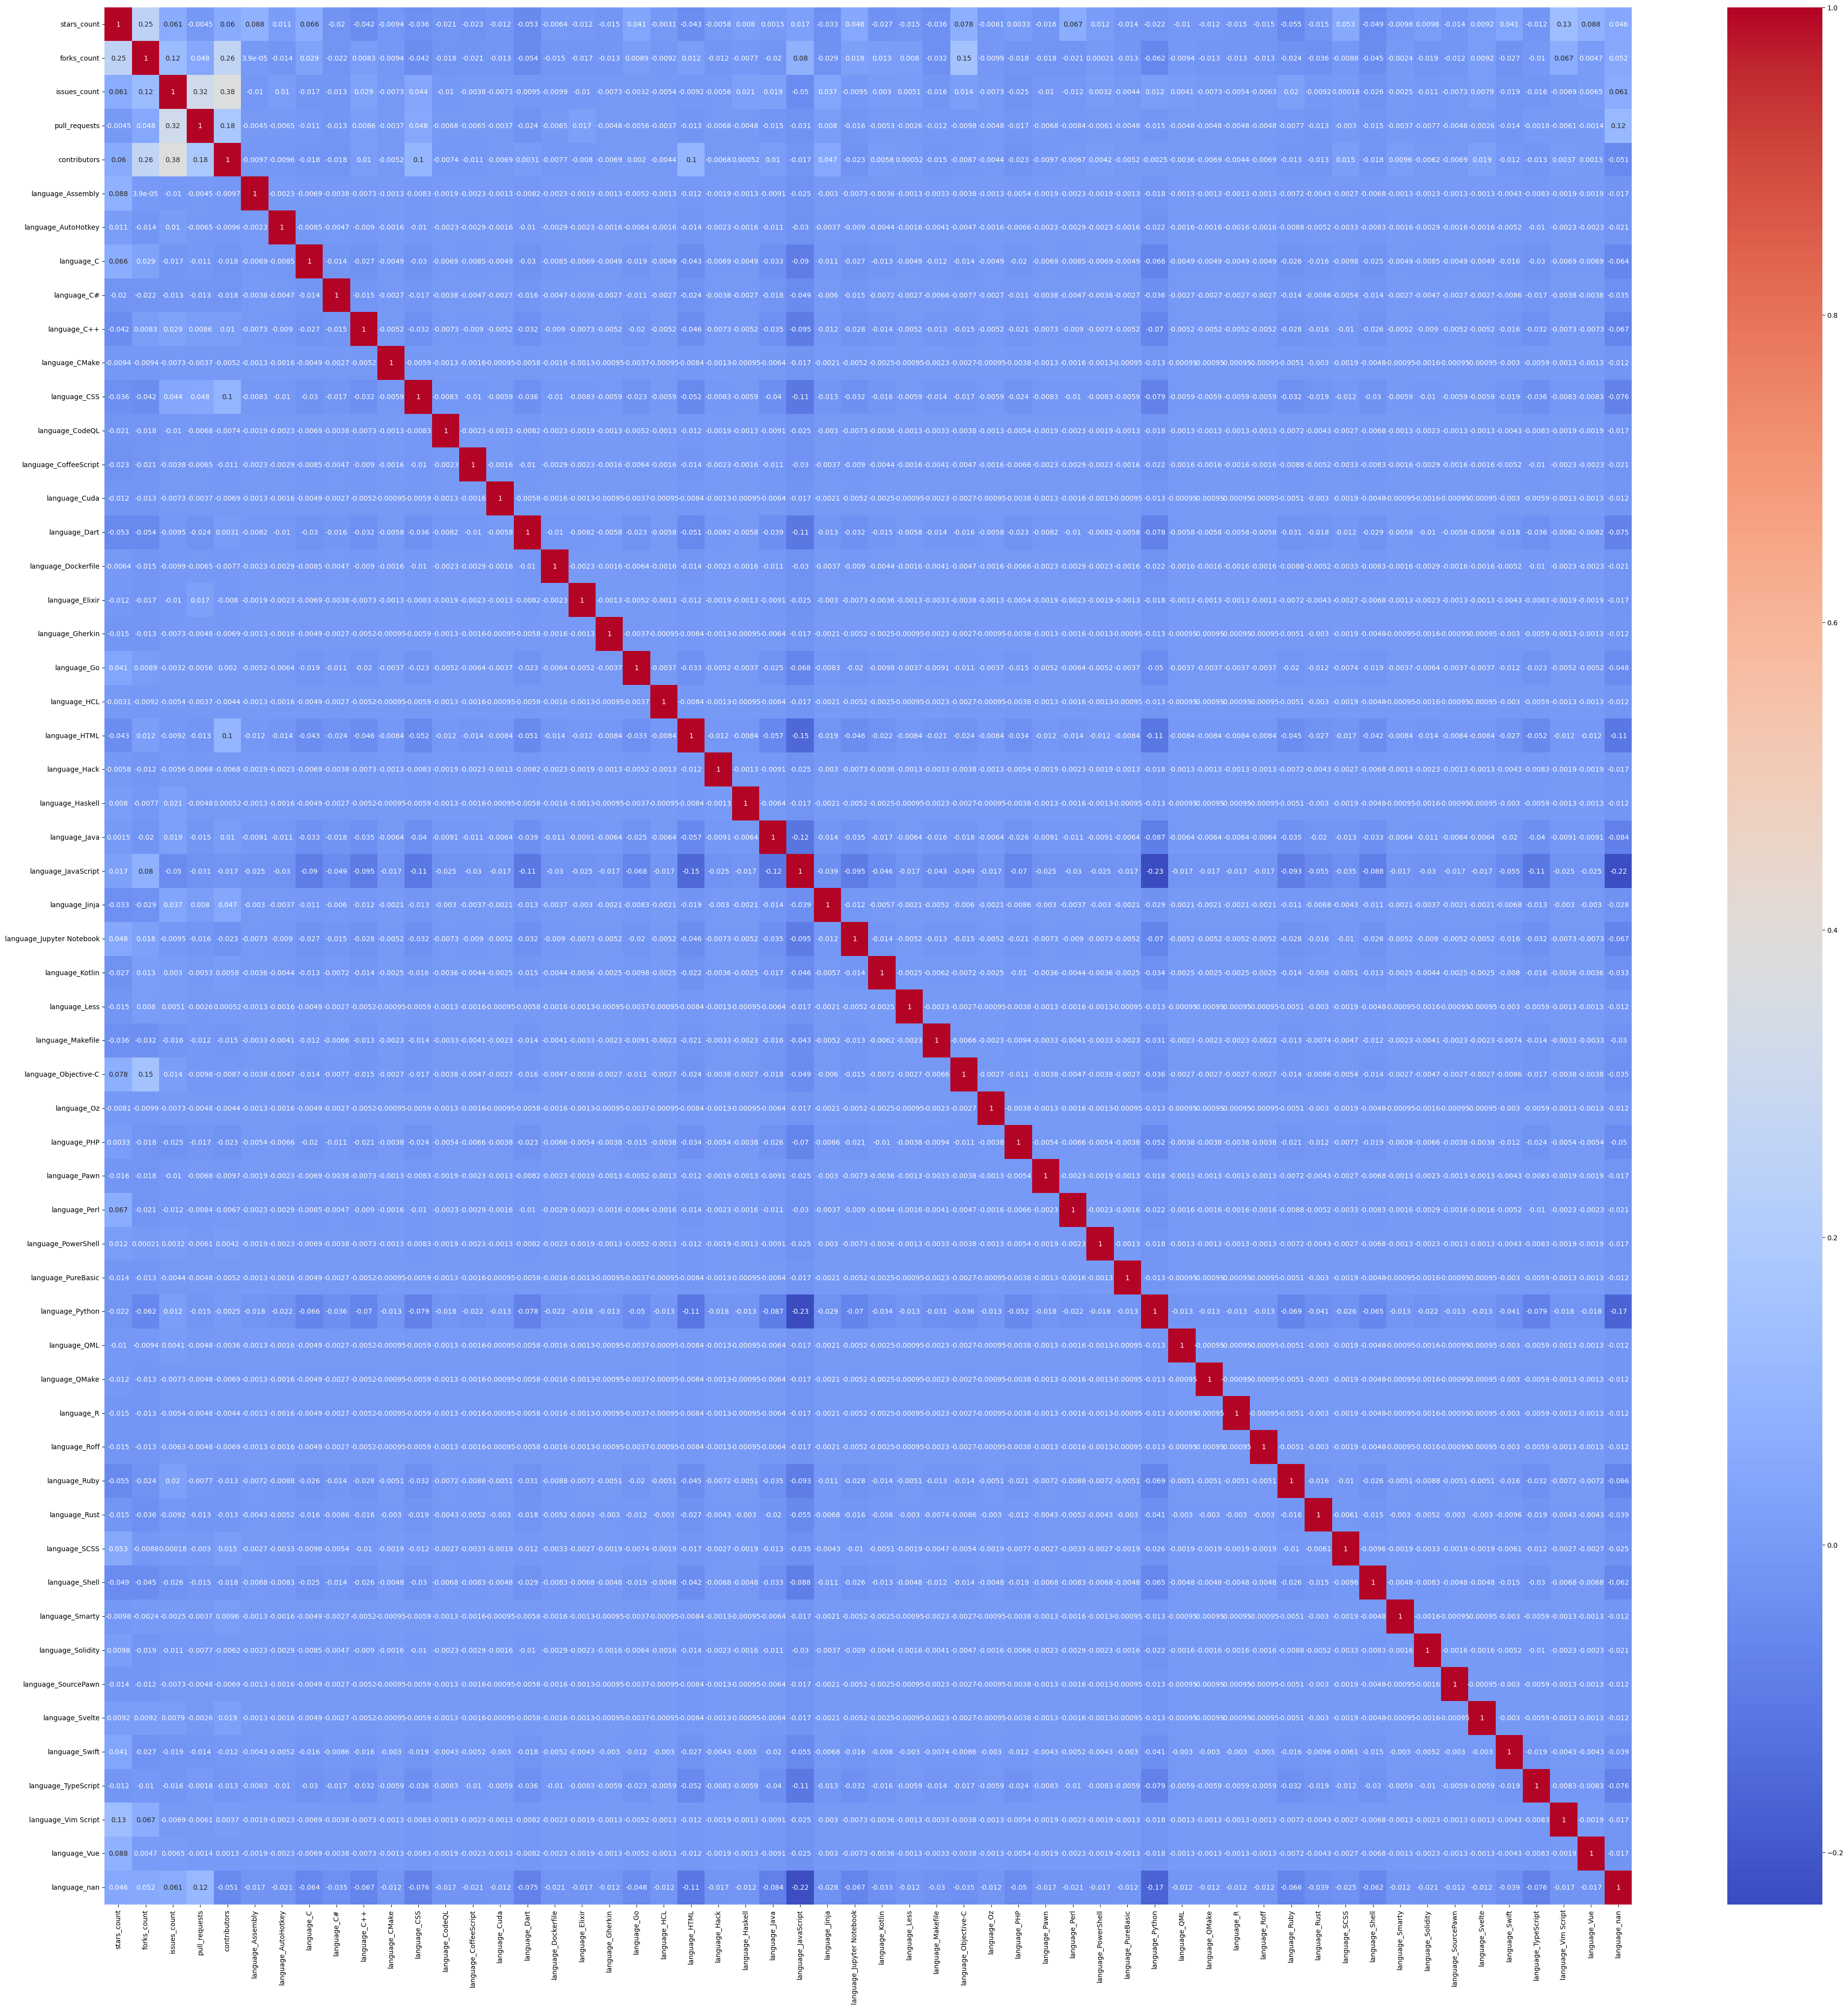

In [13]:
github_data_dummies = pd.get_dummies(github_data, columns=['language'], dummy_na=True, drop_first=True)
github_data_dummies = github_data_dummies.drop('repositories', axis=1)
# 计算相关性矩阵
correlation_matrix = github_data_dummies.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') # 绘制热图
plt.show()

# 数据集2 MovieLens 10M Dataset
## 数据摘要和可视化
首先导入需要的库，涉及数据处理，图形绘制等操作，然后读取csv文件内容。movies.dat数据集中包括了电影的编号、标题和类型三个属性，rating.dat数据集中包括了用户编号、电影编号、用户评分和时间戳四个属性，tags.dat数据集中包括了用户编号、电影编号、用户评价和时间戳四个属性。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

movies_data = pd.read_csv('dataset/ml-10M100K/movies.dat', sep='::', header=None, engine='python',
                        names=['movieId', 'title', 'genre'])
ratings_data = pd.read_csv('dataset/ml-10M100K/ratings.dat', sep='::', header=None, engine='python',
                         names=['userId', 'movieId', 'rating', 'timeStamp'])
tags_data = pd.read_csv('dataset/ml-10M100K/tags.dat', sep='::', header=None, engine='python',
                         names=['userId', 'movieId', 'tag', 'timeStamp'])

### movies.dat数据集

In [2]:
# 数据初步检查
print("数据库形状")
print("movies_data:", movies_data.shape)
# print(movies_data.describe())
print("电影类型统计")
genre_counts = movies_data['genre'].value_counts()
print(genre_counts)
print("缺失值统计")
print(movies_data.isnull().sum())

数据库形状
movies_data: (10681, 3)
电影类型统计
genre
Drama                                      1817
Comedy                                     1047
Comedy|Drama                                551
Drama|Romance                               412
Comedy|Romance                              379
                                           ... 
Animation|Fantasy|Horror                      1
Action|Fantasy|Mystery|Thriller               1
Action|Adventure|Romance|Thriller             1
Documentary|Drama|Romance|War                 1
Action|Adventure|Fantasy|Horror|Romance       1
Name: count, Length: 797, dtype: int64
缺失值统计
movieId    0
title      0
genre      0
dtype: int64


genres属性直方图(选取频率最高的20项)如下：

电影类型数: 797


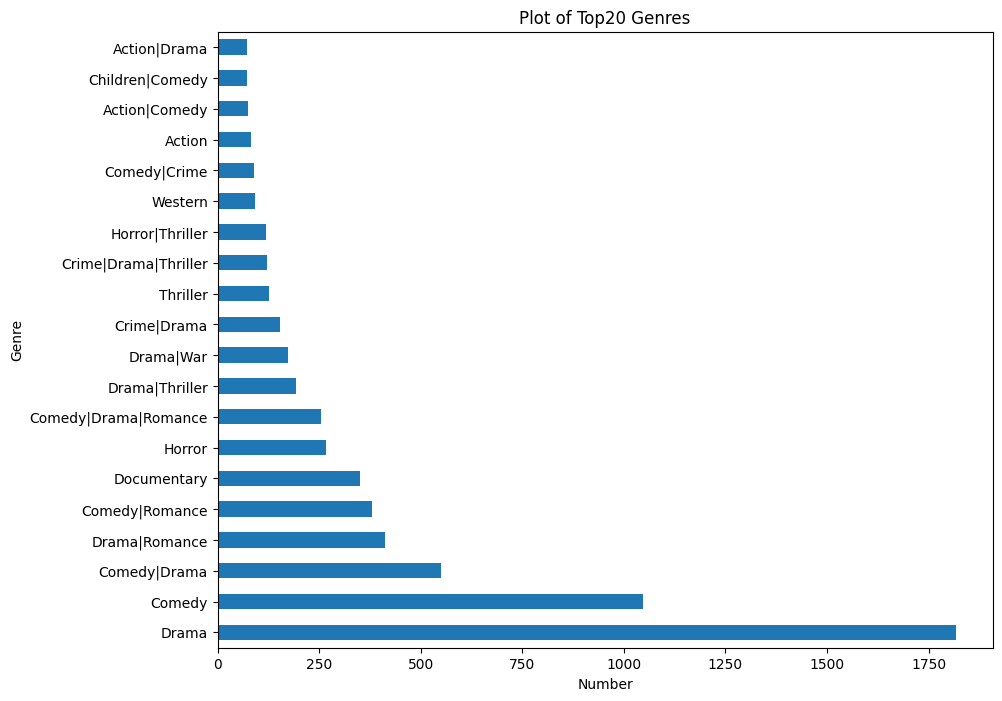

In [3]:
# 绘制直方图
print("电影类型数:", len(genre_counts))

# 选取频率最高的前20种类型
top_20_genre_counts = genre_counts.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,8))
top_20_genre_counts.plot(kind='barh')
plt.title('Plot of Top20 Genres')
plt.xlabel('Number')
plt.ylabel('Genre')
plt.show()

## 数据缺失的处理
    数据集中没有缺失值，无需处理。

### ratings.dat数据集

In [4]:
# 数据初步检查
print("数据库形状")
print("ratings_data:", ratings_data.shape)
print("数据量，均值，标准差和五数概括")
print(ratings_data['rating'].describe())
print("评分类型统计")
rating_counts = ratings_data['rating'].value_counts()
print(rating_counts)
print("缺失值统计")
print(ratings_data.isnull().sum())

数据库形状
ratings_data: (10000054, 4)
数据量，均值，标准差和五数概括
count    1.000005e+07
mean     3.512422e+00
std      1.060418e+00
min      5.000000e-01
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64
评分类型统计
rating
4.0    2875850
3.0    2356676
5.0    1544812
3.5     879764
2.0     790306
4.5     585022
1.0     384180
2.5     370178
1.5     118278
0.5      94988
Name: count, dtype: int64
缺失值统计
userId       0
movieId      0
rating       0
timeStamp    0
dtype: int64


rating属性直方图和盒图如下

评分类型数: 10


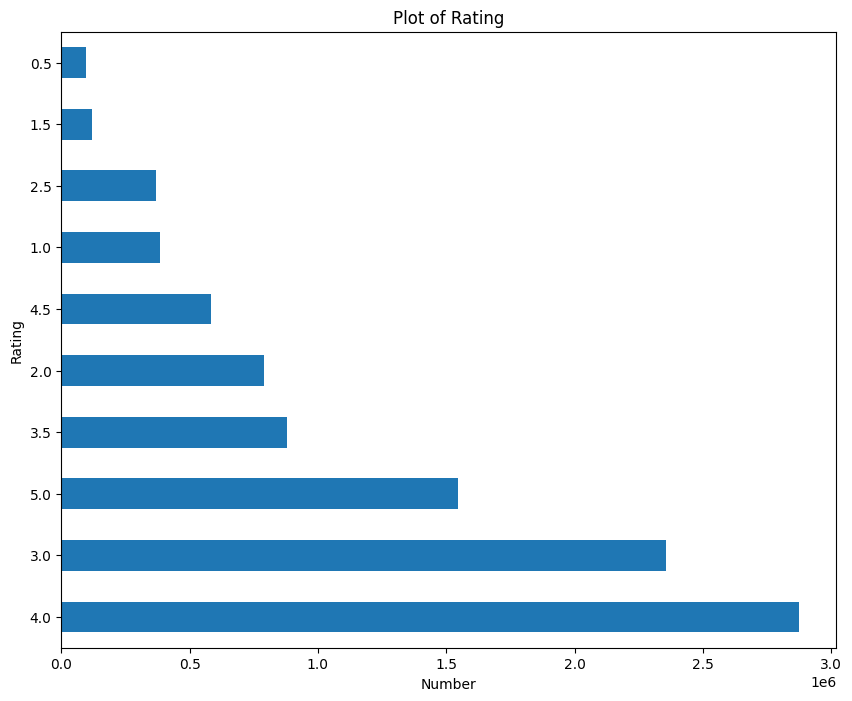

In [5]:
# 绘制直方图
print("评分类型数:", len(rating_counts))
plt.figure(figsize=(10,8))
rating_counts.plot(kind='barh')
plt.title('Plot of Rating')
plt.xlabel('Number')
plt.ylabel('Rating')
plt.show()

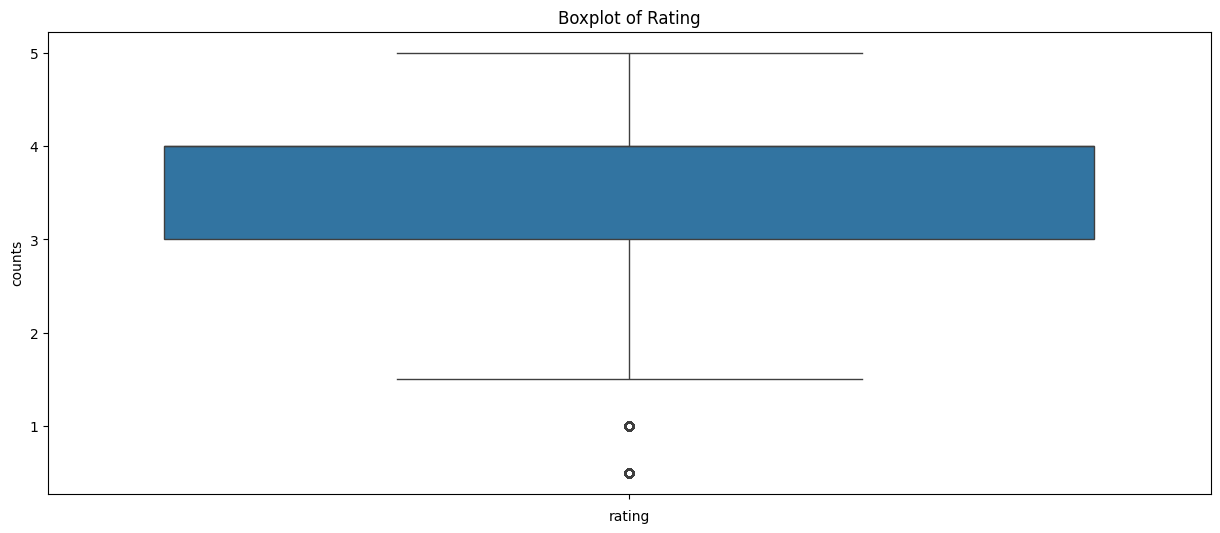

In [6]:
# 绘制盒图
plt.figure(figsize=(15, 6))
sns.boxplot(y=ratings_data['rating'])
plt.title('Boxplot of Rating')
plt.ylabel('counts')
plt.xlabel('rating')
plt.show()

## 数据缺失的处理
    数据集中没有缺失值，无需处理。

### tags.dat数据集

In [7]:
# 数据初步检查
print("数据库形状")
print("tags_data:", tags_data.shape)
# print("数据量，均值，标准差和五数概括")
# print(tags_data.describe())
print("标签类型统计")
tag_counts = tags_data['tag'].value_counts()
print(tag_counts)
print("缺失值统计")
print(tags_data.isnull().sum())

数据库形状
tags_data: (95580, 4)
标签类型统计
tag
Tumey's DVDs                    641
classic                         621
based on a book                 549
R                               518
less than 300 ratings           505
                               ... 
Shane Black                       1
Michael Winterbottom              1
I can't turn away                 1
though I know I should . . .      1
a old story of fight              1
Name: count, Length: 16528, dtype: int64
缺失值统计
userId        0
movieId       0
tag          16
timeStamp     0
dtype: int64


tag属性直方图(选取频率最高的20项)如下：

标签类型数: 16528


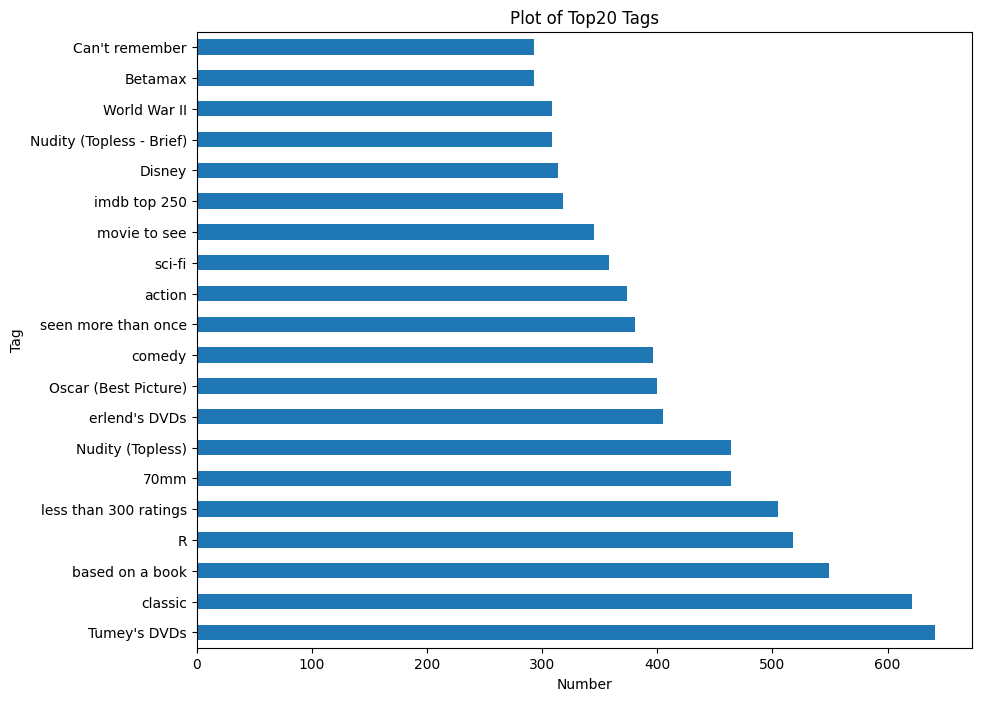

In [8]:
# 绘制直方图
print("标签类型数:", len(tag_counts))

# 选取频率最高的前20种类型
top_20_tag_counts = tag_counts.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,8))
top_20_tag_counts.plot(kind='barh')
plt.title('Plot of Top20 Tags')
plt.xlabel('Number')
plt.ylabel('Tag')
plt.show()

In [9]:
# 找出所有 tag 为空的项
empty_tags = tags_data[tags_data['tag'].isna()]
print(empty_tags)

       userId  movieId  tag   timeStamp
62986   44030      123  NaN  1199450867
62987   44030      346  NaN  1199451946
62989   44030     1184  NaN  1199452261
62993   44030     1785  NaN  1199452006
62994   44030     2194  NaN  1199450677
62995   44030     2691  NaN  1199451002
63001   44030     4103  NaN  1199451920
63002   44030     4473  NaN  1199451040
63004   44030     4616  NaN  1199452441
63018   44030     7624  NaN  1199452266
63024   44030     8898  NaN  1199450757
63031   44030    32460  NaN  1199450901
63033   44030    33826  NaN  1199450703
63037   44030    36537  NaN  1199450736
63038   44030    55805  NaN  1199450941
80185   60674    33826  NaN  1221450908


## 数据缺失的处理
### 将缺失部分剔除
统计数据缺失信息后，发现表中主要是tag缺失，查阅所有tag为空的项后，推测此类缺失是由于部分用户对电影没做类型评价。
将缺失部分剔除，删除部分数据，数据量减少，tag属性中值的频率不变。

In [19]:
tags_data_dropped = tags_data.dropna(subset=['tag'])
print("缺失值统计")
print(tags_data_dropped.isnull().sum())
print("标签类型统计")
print(tags_data_dropped['tag'].value_counts())

缺失值统计
userId       0
movieId      0
tag          0
timeStamp    0
dtype: int64
标签类型统计
tag
Tumey's DVDs                    641
classic                         621
based on a book                 549
R                               518
less than 300 ratings           505
                               ... 
Shane Black                       1
Michael Winterbottom              1
I can't turn away                 1
though I know I should . . .      1
a old story of fight              1
Name: count, Length: 16528, dtype: int64


### 用最高频率值来填补缺失值
统计tag的类型和频率后，发现频率最高的是Tumey's DVDs，用其填补缺失值，tag中Tumey's DVDs的频率上升。

In [11]:
mode_value = tags_data['tag'].mode()[0]
tags_data_filled = tags_data.fillna({'tag': mode_value})
print("缺失值统计")
print(tags_data_filled.isnull().sum())
print("标签类型统计")
print(tags_data_filled['tag'].value_counts())

缺失值统计
userId       0
movieId      0
tag          0
timeStamp    0
dtype: int64
标签类型统计
tag
Tumey's DVDs                    657
classic                         621
based on a book                 549
R                               518
less than 300 ratings           505
                               ... 
Shane Black                       1
Michael Winterbottom              1
I can't turn away                 1
though I know I should . . .      1
a old story of fight              1
Name: count, Length: 16528, dtype: int64


### 通过属性的相关关系来填补缺失值

选择tag与movieId的相关关系来填补缺失值。（tag类型过多，独热编码数量过多，且tag的主要相关属性为movieId，故不采用通过数据对象之间的相似性来填补缺失值）

In [18]:
tags_data_related = tags_data.copy()
mode_tags = tags_data.groupby('movieId')['tag'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
tags_data_related['tag'] = tags_data_related['tag'].fillna(mode_tags)
print("缺失值统计")
print(tags_data_related.isnull().sum())
print("标签类型统计")
print(tags_data_related['tag'].value_counts())

缺失值统计
userId       0
movieId      0
tag          0
timeStamp    0
dtype: int64
标签类型统计
tag
Tumey's DVDs                    641
classic                         621
based on a book                 549
R                               518
less than 300 ratings           505
                               ... 
Shane Black                       1
Michael Winterbottom              1
I can't turn away                 1
though I know I should . . .      1
a old story of fight              1
Name: count, Length: 16528, dtype: int64
